## Pandas Data Manipulation Lab

This lab is intentionally open-ended, and you're encouraged to answer your own inquisitivities about the dataset.

#### Lab Summary

On next week's episode of the 'Are You Entertained?' podcast, we're going to be analyzing the latest generation's guilty pleasure- the music of the '00s. Our Data Scientists have poured through Billboard chart data to analyze what made a hit soar to the top of the charts, and how long they stayed there. Tune in next week for an awesome exploration of music and data as we continue to address an omnipresent question in the industry- why do we like what we like?

You must provide, at least, a markdown cell explaining your key learnings about top hits: what are they, what common themes are there, is there a trend among artists (type of music)?

#### Minimum Requirements

At a minimum, you must:

- Use Pandas to read in your data
- Rename column names where appropriate
- Describe your data: check the value counts and descriptive statistics
- Make use of groupby statements
- Utilize Boolean sorting
- Assess the validity of your data (missing data, distributions?)

At a maximum, you should strive:

- Produce a blog-post ready description of your lab
- State your assumptions about the data
- Describe limitations
- Consider how you can action this from a stakeholder perspective (radio, record label, fan)
- Include visualization* (tomorrow will help)

In [1]:
import pandas as pd
file = '../data/billboard.csv'
billboard = pd.read_csv(file)
print billboard

     year      artist.inverted  \
0    2000      Destiny's Child   
1    2000              Santana   
2    2000        Savage Garden   
3    2000              Madonna   
4    2000  Aguilera, Christina   
5    2000                Janet   
6    2000      Destiny's Child   
7    2000    Iglesias, Enrique   
8    2000                Sisqo   
9    2000             Lonestar   
10   2000               N'Sync   
11   2000  Aguilera, Christina   
12   2000     Vertical Horizon   
13   2000                Creed   
14   2000              Aaliyah   
15   2000      matchbox twenty   
16   2000        Carey, Mariah   
17   2000          Hill, Faith   
18   2000                  Mya   
19   2000                Dream   
20   2000        Braxton, Toni   
21   2000        Anthony, Marc   
22   2000                  98�   
23   2000      Destiny's Child   
24   2000         3 Doors Down   
25   2000                Sisqo   
26   2000  Aguilera, Christina   
27   2000     Houston, Whitney   
28   2000     

In [3]:
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

In [4]:
billboard.columns = [c.replace('.', '_') for c in billboard.columns]
# billboard.describe()
billboard.isnull().sum()
billboard_dropna = billboard.dropna(how='all')
print len(billboard_dropna)
## 317 rows with null values ...
## but 0 rows with all null values:
# billboard[billboard.isnull().all(1)]
# billboard.describe()

billboard = billboard.dropna(1, how='all')
billboard.shape



317


(317, 72)

In [5]:
import datetime as dt
import time

billboard.date_entered = pd.to_datetime(billboard.date_entered)
billboard.date_peaked = pd.to_datetime(billboard.date_peaked)
billboard['days_to_peak'] = billboard.date_peaked - billboard.date_entered


In [6]:
billboard.artist_inverted.value_counts(ascending=False)
import numpy as np
import re
import datetime
billboard['days_to_peak'] = billboard.days_to_peak.map( lambda x: str(x))
billboard['days_to_peak'] = billboard.days_to_peak.map( lambda x: int(x.split()[0]))


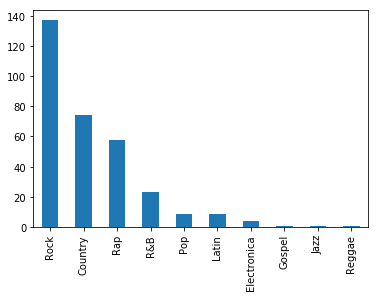

In [7]:
billboard.genre.value_counts().plot(kind='bar')
# drinks.continent.value_counts().plot(kind='bar')
# drinks.groupby('continent').mean().plot(kind='bar')
# billboard[billboard.date_peaked=='2000-12-02']
plt.show()


The overwhelming majority of top songs are in the Rock genre. However, I think that many songs classified as 'Rock' need to be corrected to either 'Pop' or 'R&B'. This reclassification could definitely bump those two genres up. How could Savage Garden possibly be 'Rock'???? 

This bothered me enough to create my own version of this dataset with accurate genres filled in.

In [8]:
billboard[billboard.genre=='Rock']

,year,artist_inverted,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x57th_week,x58th_week,x59th_week,x60th_week,x61st_week,x62nd_week,x63rd_week,x64th_week,x65th_week,days_to_peak
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49
10,2000,N'Sync,It's Gonna Be Me,3:10,Rock,2000-05-06,2000-07-29,82,70.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84
11,2000,"Aguilera, Christina",What A Girl Wants,3:18,Rock,1999-11-27,2000-01-15,71,51.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49


In [9]:
billboard[billboard.artist_inverted=='Hill, Faith']

,year,artist_inverted,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x57th_week,x58th_week,x59th_week,x60th_week,x61st_week,x62nd_week,x63rd_week,x64th_week,x65th_week,days_to_peak
17,2000,"Hill, Faith",Breathe,4:04,Rap,1999-11-06,2000-04-22,81,68.0,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168
190,2000,"Hill, Faith",Let's Make Love,4:11,Rap,2000-08-12,2000-10-21,83,83.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70


In [10]:
## I went through each song and made sure that the artist was classified in the correct genre

import pandas as pd
file = '../data/billboard_ACCURATE.csv'
billboard_edited = pd.read_csv(file)
billboard_edited.columns = [c.replace('.', '_') for c in billboard_edited.columns]
billboard_edited.dropna(axis=1,how='all')

,year,artist_inverted,track,time,genre,date_entered,date_peaked,x1st_week,x2nd_week,x3rd_week,...,x56th_week,x57th_week,x58th_week,x59th_week,x60th_week,x61st_week,x62nd_week,x63rd_week,x64th_week,x65th_week
0,2000,Destiny's Child,Independent Women Part I,3:38,R&B,9/23/00,11/18/00,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2/12/00,4/8/00,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Pop,10/23/99,1/29/00,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Pop,8/12/00,9/16/00,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Pop,8/5/00,10/14/00,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Pop,6/17/00,8/26/00,59,52.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Pop,12/25/99,3/18/00,83,83.0,44.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,4/1/00,6/24/00,63,45.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,R&B,6/24/00,8/12/00,77,66.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2000,Lonestar,Amazed,4:25,Country,6/5/99,3/4/00,81,54.0,44.0,...,25.0,26.0,31.0,32.0,37.0,42.0,42.0,45.0,50.0,NaN


In [11]:
billboard_edited.genre.value_counts()


Country        74
R&B            72
Rap            56
Rock           51
Pop            44
Latin          10
Electronica     5
Gospel          2
Reggae          2
Jazz            1
Name: genre, dtype: int64

Well now I'm mad that Country is on top. I hate country. I even went back through the file to double check that each artist in the Country genre was actually Country and was only able to change one. I'm sad.

In [12]:
import datetime as dt
import time
## convert dates to date format
billboard_edited.date_entered = pd.to_datetime(billboard_edited.date_entered)
billboard_edited.date_peaked = pd.to_datetime(billboard_edited.date_peaked)

## create a column showing the number of days it took the song to reach its peak
billboard_edited['days_to_peak'] = billboard_edited.date_peaked - billboard_edited.date_entered

billboard_edited.days_to_peak = [str(day) for day in billboard_edited.days_to_peak]
billboard_edited.days_to_peak = [int(day[0:2]) for day in billboard_edited.days_to_peak]

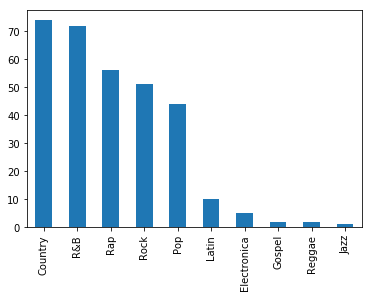

In [13]:
## plot the counts of songs by genre
billboard_edited.genre.value_counts().plot(kind='bar')
plt.show()

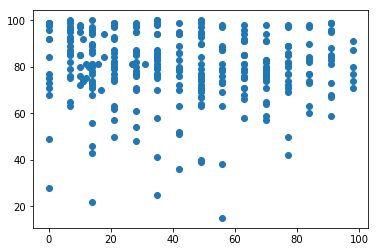

In [14]:
## plot the 1st week ranks by how long it took them to peak
plt.scatter(billboard_edited.days_to_peak,billboard_edited.x1st_week)
plt.show()

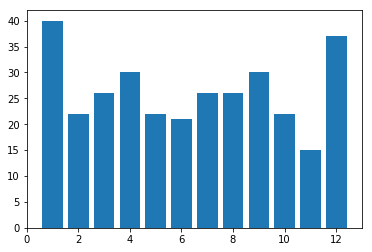

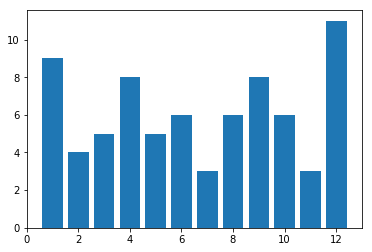

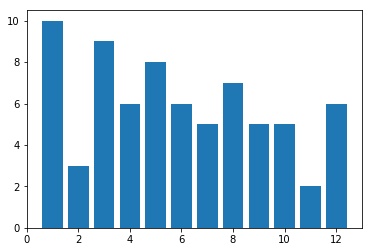

In [15]:
## plot the number of songs by month when they peaked
import matplotlib.pyplot as plt    
counts = billboard_edited['date_peaked'].dt.month.value_counts(sort=False)
plt.bar(counts.index,counts)
plt.show()

## plot just country songs by month when they peaked
df = billboard_edited[billboard_edited.genre =='Country']
counts = df['date_peaked'].dt.month.value_counts(sort=False)
plt.bar(counts.index,counts)
plt.show()


## plot just country songs by month when they peaked
df = billboard_edited[billboard_edited.genre =='R&B']
counts = df['date_peaked'].dt.month.value_counts(sort=False)
plt.bar(counts.index,counts)
plt.show()

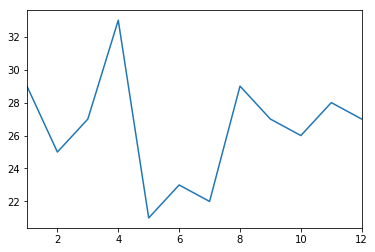

In [16]:
## plot the songs on a line graph by when they were entered
billboard_edited.date_entered.dt.month.value_counts().sort_index().plot()

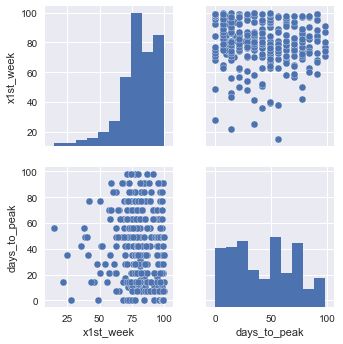

In [17]:
import seaborn as sns
sns.pairplot(billboard_edited, vars=['x1st_week','days_to_peak'])
plt.show()

It looks like lots of songs enter the Billboard list in the spring--mostly April, with most songs peaking in Dec, Jan.
Country and R&B have the most songs in this list.
Most songs peaked after about 2 months.

In [26]:
billboard_edited.columns

avg_time = []
all_songs = []
for row in billboard_edited:
    row_values = [billboard_edited.artist_inverted + ': ' + billboard_edited.track]
    for column_value in billboard_edited.columns:
        for billboard_edited[column_value]:
            if column_value.notnull():
                row_values.append(billboard_edited[column_value])
    all_songs.append(row_values)
print all_songs


SyntaxError: invalid syntax (<ipython-input-26-fbea206afdad>, line 8)